# **VISION TRANSFORMERS** by AGRI-VISIONARIES

**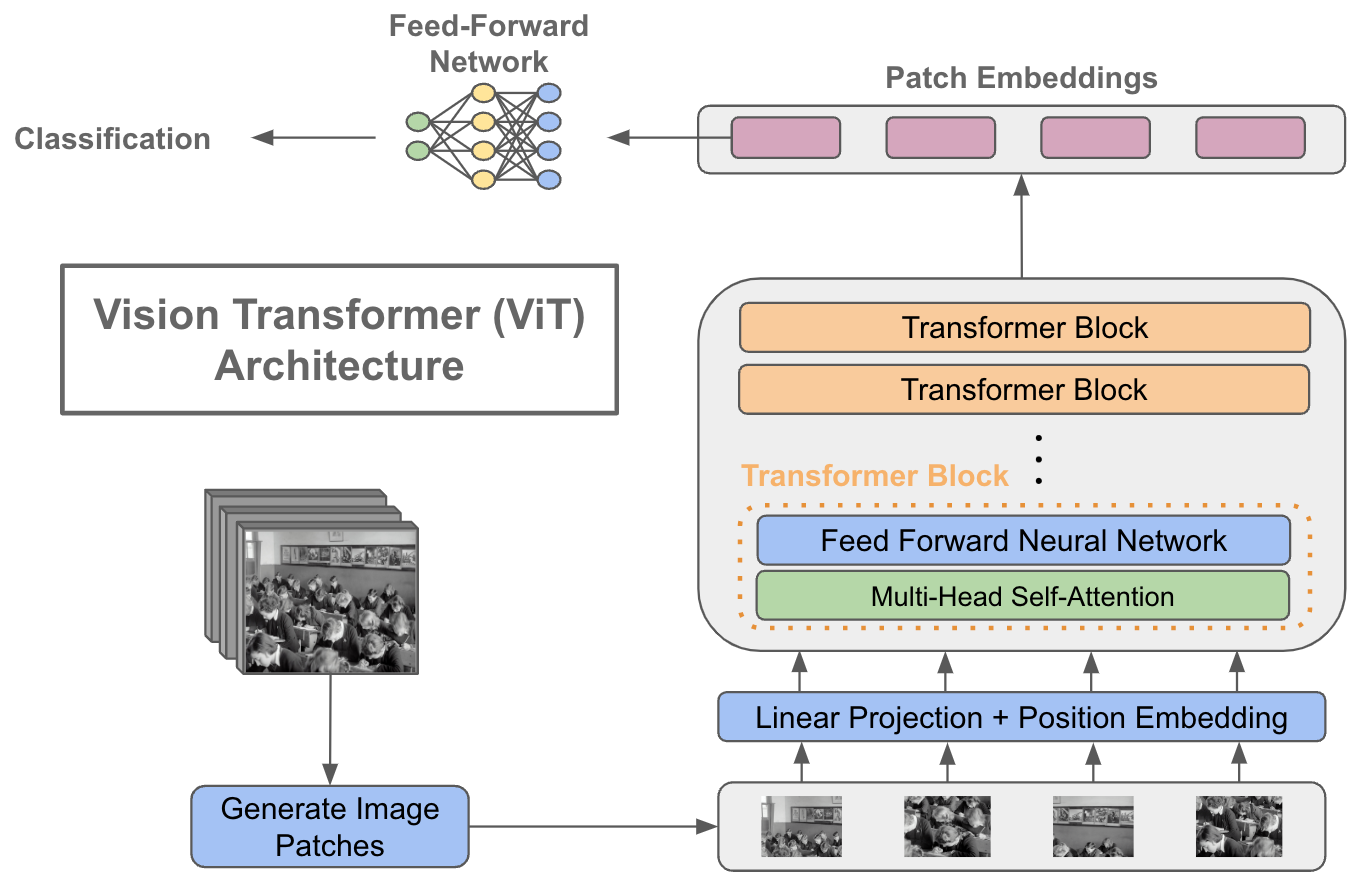**

In [ ]:
import os
import torch
import torchvision

from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers


DATASET



> Download and unzip



In [ ]:
# Download the data
import shutil

# Step 2: Download the file using wget
!wget -P /content/ https://storage.googleapis.com/air-lab-hackathon/Maize/classification/Classification_maize.zip

--2024-05-24 16:58:13--  https://storage.googleapis.com/air-lab-hackathon/Maize/classification/Classification_maize.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19414007522 (18G) [application/zip]
Saving to: ‘/content/Classification_maize.zip’

Classification_maiz 100%[===================>]  18.08G  20.7MB/s    in 15m 23s 

2024-05-24 17:13:37 (20.0 MB/s) - ‘/content/Classification_maize.zip’ saved [19414007522/19414007522]



In [ ]:
! unzip Classification_maize.zip


Streaming output truncated to the last 5000 lines.
  inflating: validation/Healthy/Healthy_121.jpg  
  inflating: validation/Healthy/Healthy_1243.jpg  
  inflating: validation/Healthy/Healthy_309.jpg  
  inflating: validation/Healthy/Healthy_1381.jpg  
  inflating: validation/Healthy/Healthy_621.jpg  
  inflating: validation/Healthy/Healthy_2569.jpg  
  inflating: validation/Healthy/Healthy_2256.jpg  
  inflating: validation/Healthy/Healthy_1086.jpg  
  inflating: validation/Healthy/Healthy_2001.jpg  
  inflating: validation/Healthy/Healthy_1628.jpg  
  inflating: validation/Healthy/Healthy_848.jpg  
  inflating: validation/Healthy/Healthy_206.jpg  
  inflating: validation/Healthy/Healthy_1382.jpg  
  inflating: validation/Healthy/Healthy_134.jpg  
  inflating: validation/Healthy/Healthy_1390.jpg  
  inflating: validation/Healthy/Healthy_51.jpg  
  inflating: validation/Healthy/Healthy_2305.jpg  
  inflating: validation/Healthy/Healthy_742.jpg  
  inflating: validation/Healthy/Healthy_

# ***Adjustments***



> Due to resource constraints, we select 1000 images from each class ie 5000 total from the train set as well as the test one hence 5000 for train and 5000 for test  these are moved to new folders



In [ ]:
import os
import shutil
from pathlib import Path

# Define the directory names
dirnames = ['FAW', 'Healthy', 'MLB', 'MLN', 'MSV']

# Define source and destination base paths
source_base_path = '/content/train'  # Replace with the actual path to the train dataset
destination_base_path = '/content/new_train'  # Replace with the actual path where you want the new dataset

# Ensure destination base path exists
Path(destination_base_path).mkdir(parents=True, exist_ok=True)

# Function to move files
def move_files(source_dir, dest_dir, num_files=1000):
    # Ensure the destination directory exists
    Path(dest_dir).mkdir(parents=True, exist_ok=True)

    # List all files in the source directory
    files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

    # Move the specified number of files
    for file_name in files[:num_files]:
        shutil.move(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

# Iterate over each directory and move the files
for dirname in dirnames:
    source_dir = os.path.join(source_base_path, dirname)
    dest_dir = os.path.join(destination_base_path, dirname)

    # Move 4000 files from source to destination
    move_files(source_dir, dest_dir, num_files=4000)

print("Files moved successfully.")


Files moved successfully.


In [ ]:
import os
import shutil
from pathlib import Path

# Define the directory names
dirnames = ['FAW', 'Healthy', 'MLB', 'MLN', 'MSV']

# Define source and destination base paths
source_base_path = '/content/validation'  # Replace with the actual path to the train dataset
destination_base_path = '/content/new_validation'  # Replace with the actual path where you want the new dataset

# Ensure destination base path exists
Path(destination_base_path).mkdir(parents=True, exist_ok=True)

# Function to move files
def move_files(source_dir, dest_dir, num_files=4000):
    # Ensure the destination directory exists
    Path(dest_dir).mkdir(parents=True, exist_ok=True)

    # List all files in the source directory
    files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

    # Move the specified number of files
    for file_name in files[:num_files]:
        shutil.move(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

# Iterate over each directory and move the files
for dirname in dirnames:
    source_dir = os.path.join(source_base_path, dirname)
    dest_dir = os.path.join(destination_base_path, dirname)

    # Move 4000 files from source to destination
    move_files(source_dir, dest_dir, num_files=4000)

print("Files moved successfully.")


Files moved successfully.


# **ABOUT VISION TRANSFORMERS**

The Vision Transformer, or ViT, is a model for image classification that employs a Transformer-like architecture over patches of the image. An image is split into fixed-size patches, each of them are then linearly embedded, position embeddings are added, and the resulting sequence of vectors is fed to a standard Transformer encoder. In order to perform classification, the standard approach of adding an extra learnable “classification token” to the sequence is used.

# **Training Vision Transformers**
Dataset Preparation:

Prepare a dataset of images with corresponding labels. Commonly used datasets include ImageNet, CIFAR-10, and CIFAR-100.
Model Initialization:

Initialize the Vision Transformer model with appropriate hyperparameters, such as the number of layers, hidden size, number of attention heads, and patch size.
Preprocessing:

Divide images into patches, flatten them, and create patch embeddings.
Add positional embeddings to the patch embeddings.
Training Loop:

Feed the preprocessed patches through the transformer encoder.
Compute the loss using a suitable loss function (e.g., cross-entropy loss for classification tasks).
Backpropagate the loss and update model parameters using an optimizer like AdamW.
Monitor performance metrics (e.g., accuracy) on a validation set.
Fine-Tuning:

Fine-tune the pretrained model on the specific task or dataset to improve performance.


In [ ]:
def set_seeds(seed:int=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# 1. Get pretrained weights for ViT-Base
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

# 2. Setup a ViT model instance with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

# 3. Freeze the base parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

# 4. Change the classifier head
class_names = ['faw-sample', 'healthy-sample', 'mlb-sample', 'mln-sample', 'msv-sample']


set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)
torch.save(pretrained_vit, "Pretrained_ViT_B_16.pth") # uncomment for model output

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:02<00:00, 155MB/s]


In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

# Print a summary using torchinfo (uncomment for actual output)
summary(model=pretrained_vit,
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 5]              768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

In [ ]:
# Load dataset
train_dir = '/content/new_train/'
test_dir = '/content/new_validation/'

# **For Augmentation**

In [ ]:
# from PIL import Image, ImageEnhance
# import os
# import random

# def augment_image(image_path, output_folder=None, num_augmentations=5):
#     """
#     Augments an image by applying various transformations and saves them in-place.

#     Args:
#         image_path (str): Path to the image file.
#         output_folder (str, optional): Folder to save augmented images.
#             If None, saves in the original image's folder (default: None).
#         num_augmentations (int, optional): Number of augmented images to create (default: 5).
#     """

#     img = Image.open(image_path)
#     filename, extension = os.path.splitext(image_path)

#     if not output_folder:
#         output_folder = os.path.dirname(image_path)

#     for i in range(num_augmentations):
#         # Apply random augmentations
#         brightness = ImageEnhance.Brightness(img)
#         contrast = ImageEnhance.Contrast(img)
#         saturation = ImageEnhance.Color(img)
#         rotation = random.randint(-45, 45)  # Random rotation

#         # Adjust augmentation parameters as needed
#         img_bright = brightness.enhance(random.uniform(0.8, 1.2))
#         img_contrast = contrast.enhance(random.uniform(0.8, 1.2))
#         img_saturation = saturation.enhance(random.uniform(0.8, 1.2))
#         img_rotated = img.rotate(rotation)

#         # Random horizontal and vertical flips
#         do_horizontal_flip = random.random() < 0.5  # 50% chance of horizontal flip
#         do_vertical_flip = random.random() < 0.5  # 50% chance of vertical flip

#         if do_horizontal_flip:
#             img_flipped = img_rotated.transpose(Image.FLIP_LEFT_RIGHT)
#         else:
#             img_flipped = img_rotated

#         if do_vertical_flip:
#             img_flipped = img_flipped.transpose(Image.FLIP_TOP_BOTTOM)

#         # Create unique filenames with a prefix
#         augmented_filename = f"{filename}_augmented_{i+1}{extension}"
#         augmented_path = os.path.join(output_folder, augmented_filename)

#         # Save the augmented image
#         img_flipped.save(augmented_path)

# # Example usage:
# folder_path = "/content/train"
# for folder in os.listdir(folder_path):
#     image_folder = os.path.join(folder_path, folder)
#     for filename in os.listdir(image_folder):
#         if filename.lower().endswith((".jpg", ".jpeg", ".png")):
#             image_path = os.path.join(image_folder, filename)
#             augment_image(image_path)  # Augment images in-place


In [ ]:
# Get automatic transforms from pretrained ViT weights
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


DATALOADERS

In [ ]:
NUM_WORKERS = os.cpu_count()

def create_dataloaders(train_dir:str, test_dir:str, transform:transforms.Compose, batch_size:int, num_workers:int=NUM_WORKERS):
    train_data = datasets.ImageFolder(train_dir, transform=transform)
    test_data = datasets.ImageFolder(test_dir, transform=transform)

    class_names = train_data.classes

    train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

    return train_dataloader, test_dataloader, class_names

print(class_names)

['faw-sample', 'healthy-sample', 'mlb-sample', 'mln-sample', 'msv-sample']


In [ ]:
# Setup dataloaders
train_dataloader_pretrained, test_dataloader_pretrained, class_names = create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=pretrained_vit_transforms,
                                                                                                     batch_size=32) # Could increase if we had more samples, such as here: https://arxiv.org/abs/2205.01580 (there are other improvements there too...)


TRAIN STEP

In [ ]:
"""
Contains functions for training and testing a PyTorch model.
"""
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]}
    For example if training for epochs=2:
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]}
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Make sure model on target device
    model.to(device)

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the filled results at the end of the epochs
    return results

TRAINING

In [ ]:
#from ViTScripts import engine

# Create optimizer and loss function
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the classifier head of the pretrained ViT feature extractor model
set_seeds()
pretrained_vit_results = train(model=pretrained_vit,
                                      train_dataloader=train_dataloader_pretrained,
                                      test_dataloader=test_dataloader_pretrained,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

In [ ]:
data_dir = 'train'
data_dir = pathlib.Path(data_dir).with_suffix('')

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

10647


SAVE MODEL STATE

In [ ]:
checkpoint = {
    'model_state_dict': pretrained_vit.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'epoch': 10,
}
torch.save(checkpoint, 'pretrained_vit_checkpoint.pth')

PLOT PREDICTIONS



In [ ]:
"""
A series of helper functions used throughout the course.

If a function gets defined once and could be used over and over, it'll go in here.
"""
import torch
import matplotlib.pyplot as plt
import numpy as np

from torch import nn
import os
import zipfile
from pathlib import Path
import requests
import os



# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})


# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


def print_train_time(start, end, device=None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time


# Plot loss curves of a model
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


# Pred and plot image function from notebook 04
# See creation: https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function
from typing import List
import torchvision


def pred_and_plot_image(
    model: torch.nn.Module,
    image_path: str,
    class_names: List[str] = None,
    transform=None,
    device: torch.device = "cuda" if torch.cuda.is_available() else "cpu",
):
    """Makes a prediction on a target image with a trained model and plots the image.

    Args:
        model (torch.nn.Module): trained PyTorch image classification model.
        image_path (str): filepath to target image.
        class_names (List[str], optional): different class names for target image. Defaults to None.
        transform (_type_, optional): transform of target image. Defaults to None.
        device (torch.device, optional): target device to compute on. Defaults to "cuda" if torch.cuda.is_available() else "cpu".

    Returns:
        Matplotlib plot of target image and model prediction as title.

    Example usage:
        pred_and_plot_image(model=model,
                            image="some_image.jpeg",
                            class_names=["class_1", "class_2", "class_3"],
                            transform=torchvision.transforms.ToTensor(),
                            device=device)
    """

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.0

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(
        target_image.squeeze().permute(1, 2, 0)
    )  # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

def set_seeds(seed: int=42):
    """Sets random sets for torch operations.

    Args:
        seed (int, optional): Random seed to set. Defaults to 42.
    """
    # Set the seed for general torch operations
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (ones that happen on the GPU)
    torch.cuda.manual_seed(seed)

In [ ]:
"""
Utility functions to make predictions.

Main reference for code creation: https://www.learnpytorch.io/06_pytorch_transfer_learning/#6-make-predictions-on-images-from-the-test-set
"""
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

from typing import List, Tuple

from PIL import Image

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Predict on a target image with a target model
# Function created in: https://www.learnpytorch.io/06_pytorch_transfer_learning/#6-make-predictions-on-images-from-the-test-set
def pred_and_plot_image(
    model: torch.nn.Module,
    class_names: List[str],
    image_path: str,
    image_size: Tuple[int, int] = (224, 224),
    transform: torchvision.transforms = None,
    device: torch.device = device,
):
    """Predicts on a target image with a target model.

    Args:
        model (torch.nn.Module): A trained (or untrained) PyTorch model to predict on an image.
        class_names (List[str]): A list of target classes to map predictions to.
        image_path (str): Filepath to target image to predict on.
        image_size (Tuple[int, int], optional): Size to transform target image to. Defaults to (224, 224).
        transform (torchvision.transforms, optional): Transform to perform on image. Defaults to None which uses ImageNet normalization.
        device (torch.device, optional): Target device to perform prediction on. Defaults to device.
    """

    # Open image
    img = Image.open(image_path)

    # Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose(
            [
                transforms.Resize(image_size),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                ),
            ]
        )

    ### Predict on image ###

    # Make sure the model is on the target device
    model.to(device)

    # Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
        transformed_image = image_transform(img).unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(transformed_image.to(device))

    # Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(
        f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
    )
    plt.axis(False)


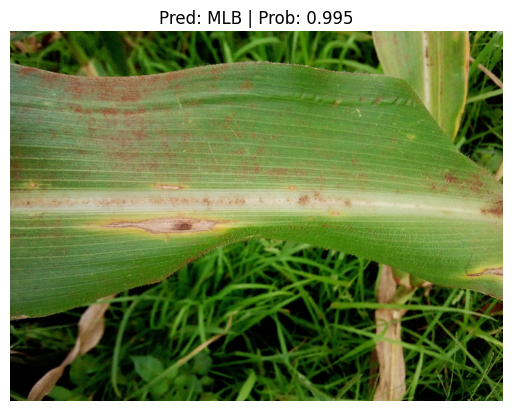

In [ ]:
import requests

# Import function to make predictions on images and plot them
#from ViTScripts.predictions import pred_and_plot_image

# Setup custom image path
custom_image_path = '/content/test/test_1.jpg'

# Predict on custom image
pred_and_plot_image(model=pretrained_vit,
                    image_path=custom_image_path,
                    class_names=class_names)

In [ ]:
print(pretrained_vit)

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

SUBMISSION

In [ ]:

# ! wget https://storage.googleapis.com/air-lab-hackathon/Maize/classification/test-sample.zip
# ! unzip test-sample.zip

In [ ]:
import glob

LOAD MODEL

In [ ]:

# To load the entire checkpoint
checkpoint = torch.load('pretrained_vit_checkpoint.pth')
pretrained_vit.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch = checkpoint['epoch']

EVALUATE

In [ ]:
import torch
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def evaluate(model, test_dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient computation for evaluation
        for data, labels in tqdm(test_dataloader):
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy

# Evaluate the model
test_accuracy = evaluate(pretrained_vit, test_dataloader_pretrained, device)

100%|██████████| 233/233 [02:46<00:00,  1.40it/s]

Accuracy: 98.04%


MAKE PREDICTIONS

In [ ]:
def make_predictions(
    model: torch.nn.Module,
    class_names: List[str],
    image_paths: List[str],
    image_size: Tuple[int, int] = (224, 224),
    transform: torchvision.transforms = None,
    device: torch.device = device,
):
    """
    Makes predictions on multiple images with a target model.

    Args:
        model (torch.nn.Module): A trained (or untrained) PyTorch model to predict on images.
        class_names (List[str]): A list of target classes to map predictions to.
        image_paths (List[str]): A list of filepaths to target images to predict on.
        image_size (Tuple[int, int], optional): Size to transform target images to. Defaults to (224, 224).
        transform (torchvision.transforms, optional): Transform to perform on images. Defaults to None which uses ImageNet normalization.
        device (torch.device, optional): Target device to perform prediction on. Defaults to device.

    Returns:
        List[List[Union[str, float]]]: A list of lists, where each inner list contains the basename of the image file and the predicted class probabilities for that image.
    """
    # Create transformation for images (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose(
            [
                transforms.Resize(image_size),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ]
        )

    # Make sure the model is on the target device
    model.to(device)

    # Turn on model evaluation mode and inference mode
    model.eval()

    predictions = []
    with torch.inference_mode():
        for img_path in image_paths:
            # Open image
            img = Image.open(img_path)

            # Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
            transformed_image = image_transform(img).unsqueeze(dim=0)

            # Make a prediction on image with an extra dimension and send it to the target device
            target_image_pred = model(transformed_image.to(device))

            # Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
            target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

            # Convert prediction probabilities to a list of scores
            scores = [score.item() for score in target_image_pred_probs[0]]

            # Append the basename of the image file and the scores to the predictions list
            predictions.append([os.path.basename(img_path), *[round(score, 4) for score in scores]])

    return predictions

In [ ]:
import glob

In [ ]:
test_images = glob.glob("test/*.jpg")

print(f'Found {len(test_images)}\n {test_images}')

test_path = test_images[2]
print(f'Analyzing sample {test_path}')

Found 3728
 ['test/test_2726.jpg', 'test/test_3255.jpg', 'test/test_3707.jpg', 'test/test_1264.jpg', 'test/test_179.jpg', 'test/test_1102.jpg', 'test/test_2828.jpg', 'test/test_1672.jpg', 'test/test_317.jpg', 'test/test_1101.jpg', 'test/test_3115.jpg', 'test/test_1828.jpg', 'test/test_1861.jpg', 'test/test_397.jpg', 'test/test_101.jpg', 'test/test_2406.jpg', 'test/test_1704.jpg', 'test/test_1629.jpg', 'test/test_2787.jpg', 'test/test_1610.jpg', 'test/test_1087.jpg', 'test/test_238.jpg', 'test/test_320.jpg', 'test/test_2779.jpg', 'test/test_357.jpg', 'test/test_3466.jpg', 'test/test_1450.jpg', 'test/test_2120.jpg', 'test/test_3045.jpg', 'test/test_3567.jpg', 'test/test_217.jpg', 'test/test_2861.jpg', 'test/test_2884.jpg', 'test/test_2079.jpg', 'test/test_734.jpg', 'test/test_3503.jpg', 'test/test_2508.jpg', 'test/test_2554.jpg', 'test/test_2670.jpg', 'test/test_1385.jpg', 'test/test_322.jpg', 'test/test_2715.jpg', 'test/test_1943.jpg', 'test/test_2771.jpg', 'test/test_169.jpg', 'test/te

PUT IMAGE PATHS IN ONE LIST

In [ ]:
import os

# Define the folder path
folder_path = '/content/drive/MyDrive/test'

# Initialize an empty list to store the file paths
file_paths = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
	# Construct the full file path
	file_path = os.path.join(folder_path, filename)

	# Add the file path to the list
	file_paths.append(file_path)

# Print the list of file paths
print(file_paths)

['/content/drive/MyDrive/test/test_2726.jpg', '/content/drive/MyDrive/test/test_3255.jpg', '/content/drive/MyDrive/test/test_3707.jpg', '/content/drive/MyDrive/test/test_1264.jpg', '/content/drive/MyDrive/test/test_179.jpg', '/content/drive/MyDrive/test/test_1102.jpg', '/content/drive/MyDrive/test/test_2828.jpg', '/content/drive/MyDrive/test/test_1672.jpg', '/content/drive/MyDrive/test/test_317.jpg', '/content/drive/MyDrive/test/test_1101.jpg', '/content/drive/MyDrive/test/test_3115.jpg', '/content/drive/MyDrive/test/test_1828.jpg', '/content/drive/MyDrive/test/test_1861.jpg', '/content/drive/MyDrive/test/test_397.jpg', '/content/drive/MyDrive/test/test_101.jpg', '/content/drive/MyDrive/test/test_2406.jpg', '/content/drive/MyDrive/test/test_1704.jpg', '/content/drive/MyDrive/test/test_1629.jpg', '/content/drive/MyDrive/test/test_2787.jpg', '/content/drive/MyDrive/test/test_1610.jpg', '/content/drive/MyDrive/test/test_1087.jpg', '/content/drive/MyDrive/test/test_238.jpg', '/content/driv

RESOLVING ISSUES



>Image test_492.jpg was corrupted and could not be opened and hence even  affected the entire process . we therefore resolved to remove it and replace with a copy of image test_493.jpg and renamed it to test_492.jpg



In [ ]:
import os

# Define the file path
file_path = '//content/drive/MyDrive/test/test_493.jpg'

# Check if the file exists
if os.path.exists(file_path):
    print("The file 'test_493.jpg' exists.")
else:
    print("The file 'test_493.jpg' does not exist.")


The file 'test_492.jpg' exists.


In [ ]:
import os
import shutil

# Define the file paths
source_file_path = '/content/drive/MyDrive/test/test_493.jpg'
destination_file_path = '/content/drive/MyDrive/test/test_492.jpg'

# Check if the source file exists
if os.path.exists(source_file_path):
    # Delete the existing "test_492.jpg" file if it exists
    if os.path.exists(destination_file_path):
        os.remove(destination_file_path)
        print("Deleted the existing 'test_492.jpg'.")

    # Copy and rename "test_493.jpg" as "test_492.jpg"
    shutil.copyfile(source_file_path, destination_file_path)
    print("Copied and renamed 'test_493.jpg' as 'test_492.jpg'.")
else:
    print("The file 'test_493.jpg' does not exist.")


Deleted the existing 'test_492.jpg'.
Copied and renamed 'test_493.jpg' as 'test_492.jpg'.


In [ ]:
import requests

# Setup custom image paths

# Make predictions on the images
predictions = make_predictions(
    model=pretrained_vit,
    class_names=class_names,
    image_paths=file_paths,
    image_size=(224, 224),
    device='cuda'  # Use 'cuda' if you have a GPU, otherwise 'cpu'
)

# # Print the predictions
# for pred in predictions:
#     print(pred)

predictions

[['test_2726.jpg', 0.0, 0.0001, 0.0001, 0.0007, 0.9991],
 ['test_3255.jpg', 0.0, 0.0, 0.0, 0.0005, 0.9995],
 ['test_3707.jpg', 0.0, 0.0, 0.0, 0.0, 1.0],
 ['test_1264.jpg', 0.0027, 0.9968, 0.0001, 0.0002, 0.0003],
 ['test_179.jpg', 0.0, 0.0008, 0.0004, 0.0, 0.9988],
 ['test_1102.jpg', 0.0, 0.0, 0.0, 0.0, 1.0],
 ['test_2828.jpg', 0.0005, 0.0007, 0.9987, 0.0, 0.0001],
 ['test_1672.jpg', 0.0003, 0.0007, 0.0011, 0.0005, 0.9975],
 ['test_317.jpg', 0.0003, 0.0018, 0.0122, 0.0004, 0.9853],
 ['test_1101.jpg', 0.0001, 0.8525, 0.0002, 0.1439, 0.0032],
 ['test_3115.jpg', 0.0, 0.9982, 0.0, 0.0018, 0.0],
 ['test_1828.jpg', 0.0, 0.0, 0.0, 0.0027, 0.9973],
 ['test_1861.jpg', 0.0, 0.0, 0.0, 0.0, 1.0],
 ['test_397.jpg', 0.0, 0.9959, 0.0, 0.0034, 0.0007],
 ['test_101.jpg', 0.0002, 0.9997, 0.0001, 0.0, 0.0],
 ['test_2406.jpg', 0.0001, 0.9993, 0.0004, 0.0, 0.0002],
 ['test_1704.jpg', 0.0002, 0.0001, 0.0072, 0.0025, 0.99],
 ['test_1629.jpg', 0.0, 0.0, 0.9999, 0.0, 0.0001],
 ['test_2787.jpg', 0.0017, 0.9823,

In [ ]:
import pandas as pd

In [ ]:
results_cols = ["filename", "faw", "healthy", "mlb", "mln", "msv"]

df = pd.DataFrame(predictions, columns=results_cols)
df.head()

,filename,faw,healthy,mlb,mln,msv
0,test_2726.jpg,0.0000,0.0001,0.0001,0.0007,0.9991
1,test_3255.jpg,0.0000,0.0000,0.0000,0.0005,0.9995
2,test_3707.jpg,0.0000,0.0000,0.0000,0.0000,1.0000
3,test_1264.jpg,0.0027,0.9968,0.0001,0.0002,0.0003
4,test_179.jpg,0.0000,0.0008,0.0004,0.0000,0.9988


In [ ]:
# Write to a csv
# Note that the csv must be named according to the team name
team_name= 'AGRI-VISIONARIES'
df.to_csv(f'{team_name}.csv', index=False)
